### GitHub repository
Link to repository used to colaborate on the assignment:
https://github.com/KarolineKlan/Assignments_ComSocSci2024.git

### Contribution statement

Team members:

- Jacob (s214596)
- Kristoffer (s214609)
- Karoline (s214638)

All members collaborated and contributed to every part of the assignment.

# Assignment 2
This assignment was formed based on Assignment 1 and the loaded networks are build on data from the program of the International Conference in Computational Social Science 2023  https://ic2s2-2023.org/program, and the data acessed using the OpenAlex API https://docs.openalex.org/. 

In [56]:
#Import relevant libraries
import json
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from itertools import product
from collections import Counter
import networkx as nx
import random
from wordcloud import WordCloud
from tqdm import tqdm
from joblib import Parallel, delayed

## Part 1: Properties of the real-world network of Computational Social Scientists
In this part of the assignment we are analyzing the CSS-network by comparing with a Random Model.

### 1.1 The random model
Building a random model from the CSS-network 

In [57]:
#load the CSS-network that was created in assignment 1
def load_network_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        G = nx.node_link_graph(data)
    return G

file_path = 'data/network_with_attributes.json'
G = load_network_from_json(file_path)


print(f'The number of nodes in G is {G.number_of_nodes()} and the amount of edges are {G.number_of_edges()}')
print(f'The denisty of G is {nx.density(G)}')
print(f'Is the graph fully connected: {nx.is_connected(G)}')

The number of nodes in G is 8478 and the amount of edges are 23778
The denisty of G is 0.0006617130855140186
Is the graph fully connected: False


We calculate p and k for the CSS-network using equation 3.2 from the network science text-book [1]


In [60]:
N = G.number_of_nodes() #8478
L = G.number_of_edges() #23778

p = 2*L/(N*(N-1)) 

#calculate the average degree using p
k = p*(N-1)
print(f'The probability of a link between two nodes is: {p}')
print(f'Average degree of the CSS-network: {k}')

The probability of a link between two nodes is: 0.0006617130855140186
Average degree of the CSS-network: 5.6093418259023355


In [61]:
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in nodes:
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)

In [62]:
# Print some information about the generated random network
print(f'The number of nodes in G is {random_network.number_of_nodes()} and the amount of edges are {random_network.number_of_edges()}')
print(f'The denisty of G is {nx.density(random_network)}')
print(f'Is the graph fully connected: {nx.is_connected(random_network)}')
print(f'The average degree of the random network is {np.mean([degree for node, degree in random_network.degree()])}')

The number of nodes in G is 8478 and the amount of edges are 23810
The denisty of G is 0.0006626036069513324
Is the graph fully connected: False
The average degree of the random network is 5.616890776126445


Text(0.5, 1.0, 'Random network')

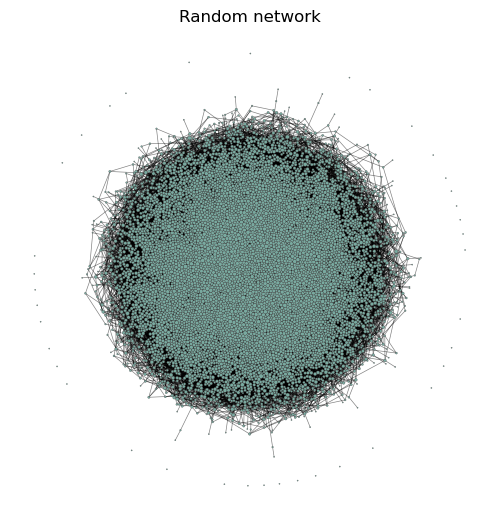

In [63]:
network, config = nw.visualize(random_network, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Random network')

Text(0.5, 1.0, 'CSS-network')

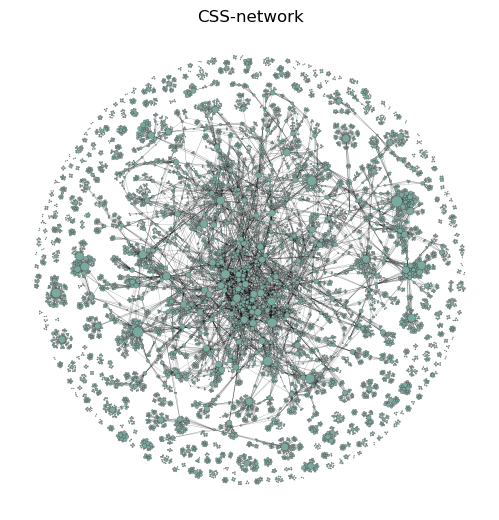

In [64]:
network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('CSS-network')

### Questions about the regime of the random network

**What regime does it fall into:** 

The average degree of our the random network < k > = 5.6 which is above the critical threshold of < k > = 1, meaning that a substantial portion of the network is connected. Since the average degree does not fall above log(N)=9 we are not in a fully connected regime, but we fall in the category of the Supercritical Regime.

**The networks structure:**

 In the supercritial regime the network begins to exhibit characteristics resembling those found in actual networks. The supercritical regime is characterized by the coexistence of multiple isolated components along with the giant component. In this regime, smaller components tend to resemble trees, whereas the giant component is characterized by the presence of loops and cycles in the connections. [1] 

**Differences:**

In the real CSS-network, connections are more unevenly distributed, leading to regions of sparse connectivity and regions with denser connectivity, and specific structural patterns, such as communities and hubs. In the random network the connection tends to have a more uniform distribution, being very dense in the middle and more sparse in the "edges". This aligns with the expectations since Real-world networks often evolve through complex processes and the random network, being uniformly generated, lack the complex structural patterns.

### 1.2 Degree distribution

In [65]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
CSS_degrees = [degree for node, degree in G.degree()]   


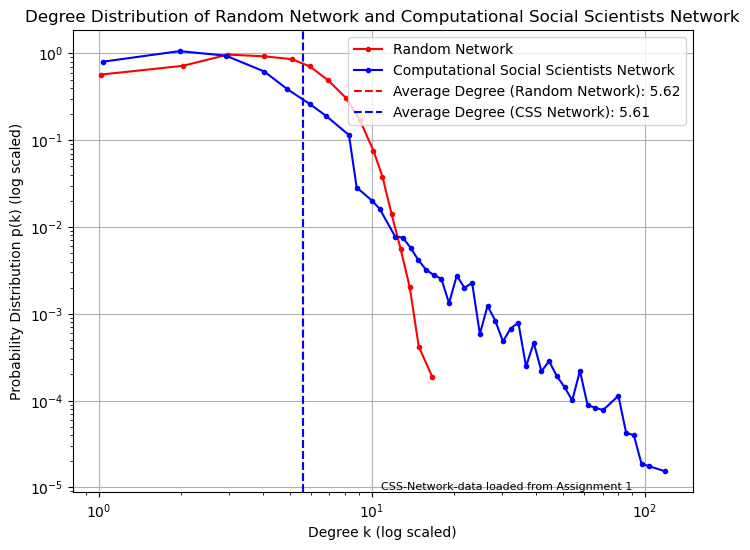

In [67]:
#Visualize the degree distribution of the random network and the CSS-network
# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_norm = np.logspace(0, np.log10(max(Normal_degrees)), 75)
bins_css = np.logspace(np.log10(min(CSS_degrees)), np.log10(max(CSS_degrees)), 75)

# define the degree distribution of the random network
hist_normal, edges_normal = np.histogram(Normal_degrees, bins=bins_norm, density=True)
x_norm = (edges_normal[1:] + edges_normal[:-1]) / 2

# Filter empty bins
xx_norm, yy_norm = zip(*[(i, j) for (i, j) in zip(x_norm, hist_normal) if j > 0])

# define the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(CSS_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_norm, yy_norm, marker='.', label='Random Network', color='r')
ax.plot(xx_css, yy_css, marker='.', label='Computational Social Scientists Network', color='b')

# Calculate average degree for both networks
avg_degree_random = np.mean(Normal_degrees)
avg_degree_css = np.mean(CSS_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_random, color='r', linestyle='--', label=f'Average Degree (Random Network): {avg_degree_random:.2f}')
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree (CSS Network): {avg_degree_css:.2f}')

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability Distribution p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network and Computational Social Scientists Network')
ax.legend()

# Show grid
ax.grid(True) 

 
data_source = "CSS-Network-data loaded from Assignment 1" 
plt.text(0.7, 0.0, data_source, ha='center', va='bottom', transform=ax.transAxes, fontsize=8)

# Show the plot
plt.show()


### Questions about the degree distribution


**Average degree as a measure:** 

Adequacy: In networks where most nodes have similar degrees, the average degree can provide a meaningful summary of the network's connectivity.

Limitations: However Power laws/pareto/heavy tailed distributions (which most real world social networks follow) can deviate from the Law of Large Numbers because the expected population mean may not be finite or the convergence of the sample mean can be slow because og high variance due to the extreme tail-values. Therefore the sample estimates, like the average used in this task, can be an unreliable estimator for the population mean in such distributions as it can be hard to capture underlying structures like hubs. This is also seen as the average degree of the two networks are almost identical even though they do not follow the same distribution.


**Difference in distribution shape and properties**

The degree distribution of a network, P(k), tells us the probability that a randomly chosen node will have degree k [2]. The degree distribution of the random network follows a symmetric distribution that resembles a Poisson the larger N gets. From the plot we see that the random network model predicts a larger number of nodes around ‹k› than seen in the CSS network [1]. In contrast, we see that the CSS network approximates a straight line in log-log-scale which means the degree distribution is a power law the slope of this line being the degree exponent. This implies a heterogeneous connectivity pattern meaning that some nodes act as major hubs while the majority have lower degrees, and the distribution has the property of being scale-free. 

## Part 2 Network Analysis in Computational Social Science
In this part of the assignment we are analyzing the CSS-network by looking at assortativity

### 2.1 Assortativity Coefficient

In [68]:
def assort_value(network):
    countries = set()
    n_edges = network.number_of_edges()
    for node in network.nodes.data():
        if node[1]['country_code'] not in countries:
            countries.add(node[1]['country_code'])
            
    subgraph = dict()
    for country in countries:
        nodes = (node for node, data in network.nodes(data=True) if data.get("country_code")==country)
        subgraph[str(country)] = network.subgraph(nodes)
    
    e = dict()
    for country in countries:
        e[str(country)] = subgraph[str(country)].number_of_edges() / n_edges
    
    a = dict()
    for node in network.nodes:
        country = str(network.nodes[node]['country_code'])
        if country not in a:
            a[country] = 0
        a[country] += network.degree[node]
    for country in countries:
        a[country] /= (2*n_edges-1)
    N1 = sum([e[country] for country in countries])
    N2 = sum([a[country]*a[country] for country in countries])
    nominator = N1-N2
    denominator = 1- sum([a[country]*a[country] for country in countries])
    r = nominator / denominator
    return r
print(f'The assortativity coefficient of the CSS-network using our own function: {assort_value(G)}')
print(f'The assortativity coefficient of the CSS-network using the networkx function: {nx.attribute_assortativity_coefficient(G, "country_code")}')

The assortativity coefficient of the CSS-network using our own function: 0.431428817372225
The assortativity coefficient of the CSS-network using the networkx function: 0.4314250091589882


### 2.2 Configuration model

In [69]:
def shuffle_net(network):
    n_edges = network.number_of_edges()
    new_network = network.copy()
    edges = list(new_network.edges)
    e = len(edges)
    for _ in range(n_edges*10):
        idx1, idx2 = random.randint(0,e-1), random.randint(0,e-1)
        if idx1 != idx2:
            u,v  = edges[idx1]
            x,y = edges[idx2]
            prob = np.random.random()
            if u != y and v != x and u != x and v != y:
                if prob < 0.5:
                    new_network.remove_edge(u,v)
                    new_network.add_edge(v,u)
                if y not in new_network.neighbors(u):
                    if x not in new_network.neighbors(v):
                        new_network.remove_edge(u,v)
                        new_network.remove_edge(x,y)
                        new_network.add_edge(u,y)
                        new_network.add_edge(x,v)
                        edges[idx1] = (u,y)
                        edges[idx2] = (x,v)
    return new_network

In [70]:
print(f"""
      Number of edges in the random network: {shuffle_net(G).number_of_edges()}
      Number of edges in the original network: {G.number_of_edges()}""")


      Number of edges in the random network: 23778
      Number of edges in the original network: 23778


### 2.3 Analyzing Assortativity in Random Network

In [71]:
# Shuffle the CSS-network 100 times
network_list_100 = Parallel(n_jobs=4)(delayed(shuffle_net)(G) for _ in tqdm(range(100)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


100%|██████████| 100/100 [00:53<00:00,  1.89it/s]


In [72]:
#run test using own function
assort_value_list = Parallel(n_jobs=4)(delayed(assort_value)(network) for network in tqdm(network_list_100))

100%|██████████| 100/100 [00:02<00:00, 35.82it/s]


In [ ]:
#run test using the networkx function
#assort_value_list = Parallel(n_jobs=4)(delayed(nx.attribute_assortativity_coefficient)(network, 'country_code') for network in tqdm(network_list_100))

100%|██████████| 100/100 [00:02<00:00, 41.89it/s]


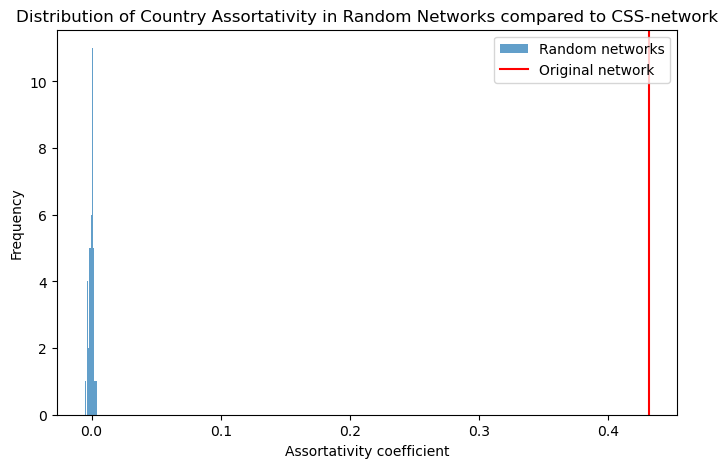

In [73]:
assort_value_CSS = nx.attribute_assortativity_coefficient(G, 'country_code')

plt.figure(figsize=(8, 5))
plt.hist(assort_value_list, bins=30, alpha=0.7, label='Random networks')
plt.axvline(assort_value_CSS, color='red', label='Original network')
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Country Assortativity in Random Networks compared to CSS-network')
plt.legend(loc='upper right')
plt.show()

### 2.4 Assortativity by Degree

In [74]:
def degree_assortativity(network):
    # Calculate degree assortativity
    num_edges = network.number_of_edges()
    degrees = dict(network.degree())

    kukv = sum(degrees[node1]*degrees[node2] for (node1, node2) in network.edges)  / num_edges
    kuv = [(degrees[node1], degrees[node2]) for (node1,node2) in network.edges] 
    ku = sum([ku[0] for ku in kuv]) / num_edges
    kv = sum([kv[1] for kv in kuv]) / num_edges 
 
    norm_term = np.sqrt(sum([ku[0]**2 for ku in kuv])/num_edges - ku**2)*np.sqrt(sum([kv[1]**2 for kv in kuv]) / num_edges - kv**2)
    return (kukv-ku*kv) / norm_term

print(f'The degree assortativity coefficient of the CSS-network using our own function: {degree_assortativity(G)}')
print(f'The degree assortativity coefficient of the CSS-network using the networkx function: {nx.degree_assortativity_coefficient(G)}')

The degree assortativity coefficient of the CSS-network using our own function: -0.07912503849715283
The degree assortativity coefficient of the CSS-network using the networkx function: -0.10595217811904795


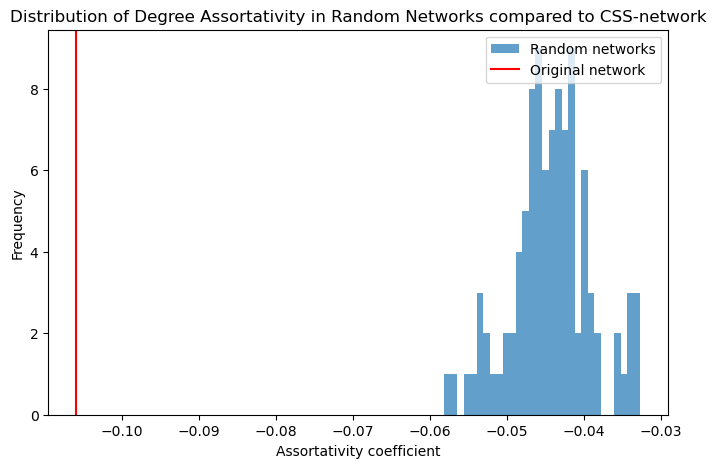

In [77]:
degree_value_CSS = nx.degree_assortativity_coefficient(G)
degree_value_random = Parallel(n_jobs=4)(delayed(nx.degree_assortativity_coefficient)(G) for G in network_list_100)

plt.figure(figsize=(8, 5))
plt.hist(degree_value_random, bins=30, alpha=0.7, label='Random networks')
plt.axvline(degree_value_CSS, color='red', label='Original network')
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Assortativity in Random Networks compared to CSS-network')
plt.legend(loc='upper right')
plt.show()

### 2.5 Reflection questions 

> 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?  

For the CSS network, the degree assortativity was -0.07, which indicates a dissassortive network meaning that nodes with high degree tend to be connected to nodes with low degree. A dissassortive network means that nodes with high degree tend to be connected to nodes with low degree. This is somewhat in line of what we expected for the CSS network as we would expect that authors with high degree would tend to write with lower degree authors to further their network, and new up-coming authors would tend to write with high degree authors benefit from the expering and reputation of the more established authors.
> 8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?    

When implementing the cofiguration model we introduce randomness and break potential patterns within the network while still preserving the degree distribution. Like the attribute assorssartivity coefficient regarding the 'country_code' where in the plot we see the assortativity coefficient is around 0, for the configuration model. This is because the country code is randomly assigned to each node, and the edge flipping is included to break any potential patterns that might be present in the network. Flipping 50% of the time strikes a balance between a fully randomize network and preserving some of the original structure.
> 9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations. 

The distribution of degree assortativity values for the random networks are very close to that of the origional CSS network for which the random networks are generated from. This aligns with the theoretical expectations as the configuration model when using the double edge swap method preserves the degree distribution of the original network.

### Central nodes

In [79]:
def top_closeness_centrality(G, top=5):
    closeness = nx.closeness_centrality(G)
    sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

    return sorted_closeness[:top]

def top_eigenvector_centrality(G, top=5):
    eigenvector = nx.eigenvector_centrality_numpy(G)
    sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

    return sorted_eigenvector[:top]

top_5_eigenvector = top_eigenvector_centrality(G)
top_5_closeness = top_closeness_centrality(G)

print(f"Top 5 nodes by eigenvector centrality:")
for i, (node, value) in enumerate(top_5_eigenvector):
    print(f"{i+1}. Node: {node}, Eigenvector centrality: {value}")

print(f"Top 5 nodes by closeness centrality:")
for i, (node, value) in enumerate(top_5_closeness):
    print(f"{i+1}. Node: {node}, Closeness centrality: {value}")

#print(f"Top 5 nodes by eigenvector centrality: {top_5_eigenvector}")
#print(f"Top 5 nodes by closeness centrality: {top_5_closeness}")

Top 5 nodes by eigenvector centrality:
1. Node: https://openalex.org/A5046546654, Eigenvector centrality: 0.26993879821648115
2. Node: https://openalex.org/A5031799782, Eigenvector centrality: 0.23265589222774255
3. Node: https://openalex.org/A5025218537, Eigenvector centrality: 0.2016626766089302
4. Node: https://openalex.org/A5014662127, Eigenvector centrality: 0.20135167006925955
5. Node: https://openalex.org/A5039841997, Eigenvector centrality: 0.2012966917228618
Top 5 nodes by closeness centrality:
1. Node: https://openalex.org/A5038976962, Closeness centrality: 0.14292778570762626
2. Node: https://openalex.org/A5014662127, Closeness centrality: 0.14020683981165794
3. Node: https://openalex.org/A5082358191, Closeness centrality: 0.1393975802887392
4. Node: https://openalex.org/A5044033087, Closeness centrality: 0.13936623973035
5. Node: https://openalex.org/A5046546654, Closeness centrality: 0.138939326821467


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


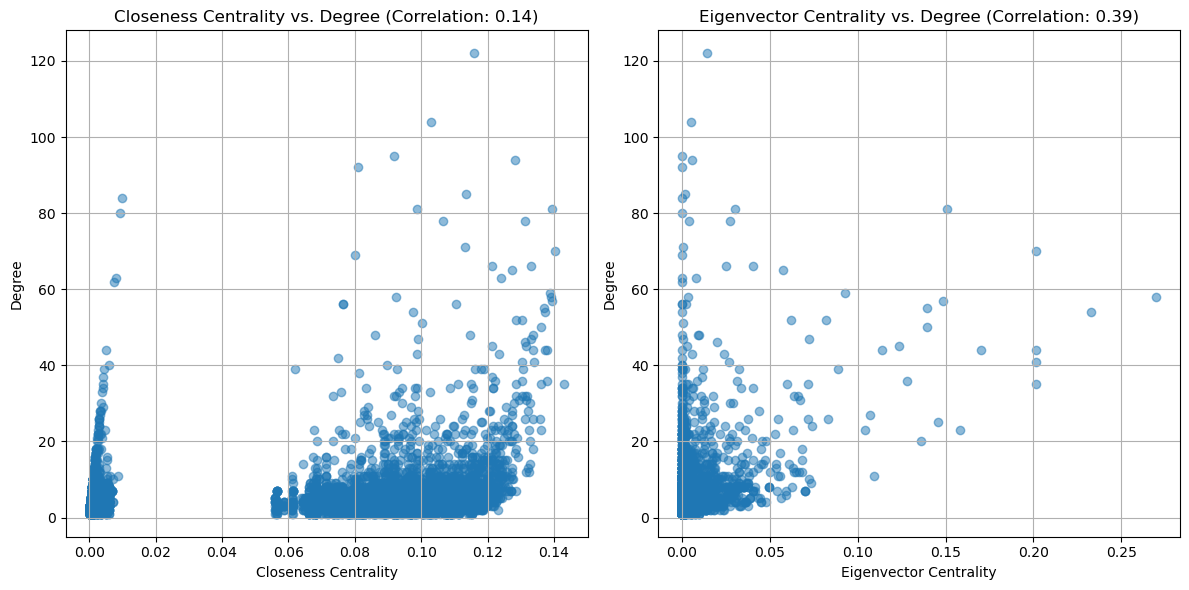

In [80]:
closeness_centralities = nx.closeness_centrality(G)
eigenvector_centralities = nx.eigenvector_centrality_numpy(G)
degrees = dict(G.degree())


closeness_values = np.array([closeness_centralities[node] for node in G.nodes()])
eigenvector_values = np.array([eigenvector_centralities[node] for node in G.nodes()])
degree_values = np.array([degrees[node] for node in G.nodes()])


correlation_closeness_degree = np.corrcoef(closeness_values, degree_values)[0, 1]
correlation_eigenvector_degree = np.corrcoef(eigenvector_values, degree_values)[0, 1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(closeness_values, degree_values, alpha=0.5)
axs[0].set_xlabel('Closeness Centrality')
axs[0].set_ylabel('Degree')
axs[0].set_title(f'Closeness Centrality vs. Degree (Correlation: {correlation_closeness_degree:.2f})')
axs[0].grid(True)


axs[1].scatter(eigenvector_values, degree_values, alpha=0.5)
axs[1].set_xlabel('Eigenvector Centrality')
axs[1].set_ylabel('Degree')
axs[1].set_title(f'Eigenvector Centrality vs. Degree (Correlation: {correlation_eigenvector_degree:.2f})')
axs[1].grid(True)
plt.tight_layout()
plt.show()


Text questions:
> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play? 

The 5 most central scientists according to closeness centrality are the ones with on average the shortest path to all other authors in the network. These 5 authors are likely the ones who have collaborated with the most different fields of research and communities within the network therefore creating the shortest path to all other authors.

> * Find the 5 most central scientists according to eigenvector centrality.     
> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why? 

We observe that there is little to no correlation between the closeness centrality and the degree of the nodes. This indicates that having a high number of collaborations aka. high degree does not mean that the author is central in the network. This is somewhat not expected, as we found the degree assortativity coefficient to be negative, meaning that nodes with high degree tend to be connected to nodes with low degree and we would expect the closeness centrality to be high for nodes with high degree also seeing a stronger correlation.

> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

The 5 most central scientists according to eigenvector centrality are the ones with the highest number of connections to other well-connected authors. Here we observe a stronger correlation between the eigenvector centrality and the degree of the nodes. Eigenvector centrality measure how well connected a node is to other well connected nodes, meaning that highly connected authors are likely to also have collaborated with eachother. Which is more expected than the closeness centrality, as we would expect that well connected authors are likely to have collaborated with eachother.



## Part 3 - Words that characterize Computational Social Science communities

### 3.1 TF-IDF and the Computational Social Science communities

In [107]:
#load the CSS-network from week 6 exercise 4
file_path = 'data/network_with_attributes_and_communities.json'
G_CSS = load_network_from_json(file_path)

print("Nodes:", len(G_CSS.nodes))
print("Edges:", len(G_CSS.edges))

Nodes: 8478
Edges: 23778


In [108]:
#load the abstracts dataset from week 7 exercise 2
df_abstracts = pd.read_csv('data/Abstracts_TOKENIZED.csv')
df_abstracts['Tokens'] = df_abstracts['Tokens'].apply(ast.literal_eval)
df_abstracts.head()

,Unnamed: 0,id,title,abstract_inverted_index,Text,Tokens
0,https://openalex.org/W2043890595,https://openalex.org/W2043890595,The role of the airline transportation network...,"{'The': [0], 'systematic': [1], 'study': [2, 8...",The systematic study of large-scale networks h...,"[systematic, study, networks, unveiled, ubiqui..."
1,https://openalex.org/W2095072199,https://openalex.org/W2095072199,Finding local community structure in networks,"{'Although': [0], 'the': [1, 18, 26, 46, 57, 7...",Although the inference of global community str...,"[although, inference, global, community_struct..."
2,https://openalex.org/W1965715402,https://openalex.org/W1965715402,Velocity and Hierarchical Spread of Epidemic O...,"{'We': [0], 'study': [1], 'the': [2, 5, 12, 27...",We study the effect of the connectivity patter...,"[study, effect, connectivity, pattern, complex..."
3,https://openalex.org/W2096296558,https://openalex.org/W2096296558,Dynamical patterns of epidemic outbreaks in co...,"{'We': [0, 20], 'present': [1], 'a': [2, 68, 8...",We present a thorough inspection of the dynami...,"[present, thorough, inspection, dynamical, beh..."
4,https://openalex.org/W2102017123,https://openalex.org/W2102017123,Systematic inequality and hierarchy in faculty...,"{'The': [0], 'faculty': [1, 26, 48, 66, 76, 11...",The faculty job market plays a fundamental rol...,"[faculty, job, market, plays, fundamental, rol..."


#### 3.1.1 What does TF and IDF stand for 
WRITE HERE

#### 3.1.2 large documents for each community

In [109]:

df_community = pd.DataFrame(columns=['author_ids', 'degree', 'community'])

for i, node in enumerate(G_CSS.nodes()):
    df_community.loc[i] = [node, G_CSS.degree(node), G_CSS.nodes[node]['community']]

com_list = df_community['community'].sort_values()

In [110]:
df_abstracts.Tokens

0       [systematic, study, networks, unveiled, ubiqui...
1       [although, inference, global, community_struct...
2       [study, effect, connectivity, pattern, complex...
3       [present, thorough, inspection, dynamical, beh...
4       [faculty, job, market, plays, fundamental, rol...
                              ...                        
3560    [analyze, diffusive, motion, kink, solitons, g...
3561    [working, within, framework, nonlinear, models...
3562    [study, problem, front, propagation, presence,...
3563    [dielectric, spectra, tibo, single, crystals, ...
3564    [study, possibility, kink, motion, induced, pu...
Name: Tokens, Length: 3565, dtype: object

In [111]:
#load the papers dataset from assignment 2
df_papers = pd.read_csv('data/IC2S2_all_papers.csv')
df_papers = df_papers.drop_duplicates(subset=["id"])
df_papers['author_ids'] = df_papers['author_ids'].apply(ast.literal_eval) # convert string to list
Long_paper_df = df_papers.explode("author_ids")

Long_paper_df.head()

,id,publication_year,cited_by_count,author_ids
0,https://openalex.org/W2095072199,2005,713,https://openalex.org/A5014647140
1,https://openalex.org/W2102017123,2015,393,https://openalex.org/A5014647140
1,https://openalex.org/W2102017123,2015,393,https://openalex.org/A5027903946
1,https://openalex.org/W2102017123,2015,393,https://openalex.org/A5027079032
2,https://openalex.org/W2513567506,2017,355,https://openalex.org/A5072266097


In [112]:
# Merge df_papers with df_abstracts on id
df_merged_papers = pd.merge(Long_paper_df, df_abstracts, on='id')


# Merge df_merged with df_community on author_ids
df_merged_authors = pd.merge(df_merged_papers, df_community, on='author_ids')

# Define a function to extract tokens and concatenate them for each community
def concatenate_tokens(group):
    tokens_list = group['Tokens'].explode().tolist() #should be list of strings
    return tokens_list

# Group by community and apply the function to concatenate tokens
community_tokens = df_merged_authors.groupby('community').apply(concatenate_tokens)

# Reset index to convert the groupby result back to a DataFrame
community_tokens = community_tokens.reset_index(name='Tokens')

community_tokens.head()

,community,Tokens
0,0,"[crowd, employment, new, form, flexible, emplo..."
1,1,"[abstract, fight, pandemic, lockdowns, succeed..."
2,2,"[persuasion, core, norm, creation, emergence, ..."
3,3,"[learning, perceive, produce, speech, children..."
4,4,"[recurring, theme, sociological, research, tra..."


In [113]:
#print some insights
for i in range(10):
    c = community_tokens['community'][i]
    print(f"for community {c} we have the following number of tokens: {len(community_tokens['Tokens'][i])}")


for community 0 we have the following number of tokens: 26861
for community 1 we have the following number of tokens: 54794
for community 2 we have the following number of tokens: 55196
for community 3 we have the following number of tokens: 2682
for community 4 we have the following number of tokens: 30142
for community 5 we have the following number of tokens: 3409
for community 6 we have the following number of tokens: 1809
for community 7 we have the following number of tokens: 42978
for community 8 we have the following number of tokens: 11125
for community 9 we have the following number of tokens: 256


### 3.2 Term frequency
Since the TF is the term frequency of the word/token in the community, we can get the words that appear the most often and devide by the total amount of words in the community.

In [115]:
#the top 5 communities
top_5_communities = df_community['community'].value_counts().nlargest(5).index.tolist()

#for each top 5 community, print the top 5 most common tokens
for community in top_5_communities:
    print("-----------------------------------------------------------------------")
    print(f"Community {community}")
    print("-----------------------------------------------------------------------")
    tokens = community_tokens["Tokens"][community_tokens["community"] == community].explode().tolist()
    tokens_series = pd.Series(tokens)
    print(f"The top 5 most common tokens in community {community} by the TF are:")
    print(tokens_series.value_counts().nlargest(5)/len(tokens_series)) # Normalized by the total number of tokens in the community
    print("\n")

-----------------------------------------------------------------------
Community 23
-----------------------------------------------------------------------
The top 5 most common tokens in community 23 by the TF are:
model       0.008043
social      0.006884
networks    0.006573
data        0.006427
models      0.005434
Name: count, dtype: float64


-----------------------------------------------------------------------
Community 2
-----------------------------------------------------------------------
The top 5 most common tokens in community 2 by the TF are:
model      0.006776
using      0.004566
results    0.004076
new        0.004058
paper      0.004058
Name: count, dtype: float64


-----------------------------------------------------------------------
Community 19
-----------------------------------------------------------------------
The top 5 most common tokens in community 19 by the TF are:
social      0.008286
data        0.007993
users       0.006459
networks    0.005611
sy

** ISERT TEXT QUESTION

##### Inverse document frequency

In [93]:
idf_scores = {}
for c in top_5_communities: # Loop over 5 largest communities
    #Get all Work-ids for the works written by community members
    Works = list(df_merged_authors.loc[df_merged_authors["community"] == c, "id"])  

    # Retrieve all tokens used throughout the abstracts tied to authors from the community
    community_tokens = []
    token_doc_frequency = Counter()
    for idx, work in enumerate(Works):

        tokens = list(df_merged_authors.loc[df_merged_authors["id"] == work, "Tokens"])[0]
        token_doc_frequency.update(set(tokens))
    

    # Calculate IDF score based on the df of the individual tokens 
    idf_scores[c] = {}
    for token, freq in token_doc_frequency.items():
        idf_scores[c][token] = np.log2(len(Works) / freq)

# Plot the top 5 IDF words along with their score for each community
for c in top_5_communities:
    print("-----------------------------------------------------------------------")
    print("Community:", c)
    print("-----------------------------------------------------------------------")
    print(f"The top 5 tokens in community {c} by the IDF are:")
    top_idf_scores = sorted(idf_scores[c].items(), key=lambda x: x[1], reverse=True)[:5]
    
    for token, score in top_idf_scores:
        data = [token, score]
        print('{:<12s}{:>15.7f}'.format(data[0],data[1]))
    print("\n")


-----------------------------------------------------------------------
Community: 23
-----------------------------------------------------------------------
The top 5 tokens in community 23 by the IDF are:
intact           10.0028150
email            10.0028150
portable         10.0028150
emails           10.0028150
billion          10.0028150


-----------------------------------------------------------------------
Community: 2
-----------------------------------------------------------------------
The top 5 tokens in community 2 by the IDF are:
reversal          9.2143191
derivatives       9.2143191
lambertian        9.2143191
synthesized       9.2143191
mirror            9.2143191


-----------------------------------------------------------------------
Community: 19
-----------------------------------------------------------------------
The top 5 tokens in community 19 by the IDF are:
teaches           8.2946207
committees        8.2946207
essay             8.2946207
improving    

*** Indsæt tekst svar mht valg af logarithme ***

In [103]:
Top_9_communities = list(df_community['community'].value_counts().nlargest(9).index)
TF_IDF = {}
TF = {}
top_authors = {}

for c in Top_9_communities:
    #Calculate token frequency within a community.
    Works = list(df_merged_authors.loc[df_merged_authors["community"] == c, "id"])
    community_tokens = []
    token_doc_frequency = Counter()
    token_term_frequency = Counter()
    for idx, work in enumerate(Works):
        tokens = list(df_merged_authors.loc[df_merged_authors["id"] == work, "Tokens"])[0]
        community_tokens += tokens
        token_doc_frequency.update(set(tokens))
        token_term_frequency.update(tokens)


    # Calculate IDF and TF-IDF scores for the top 9 largest communities
    TF_IDF[c] = {}
    TF[c] = {}
    for token, freq  in token_term_frequency.items():
        TF[c][token] = freq / len(community_tokens)

    for token, freq  in token_doc_frequency.items():
        idf = np.log2(len(Works) / freq)
        TF_IDF[c][token] = TF[c][token] * idf
        
        
    # Top 10 TF words in the community
    top_tf_scores = sorted(TF[c].items(), key=lambda x: x[1], reverse=True)[:10]
    print("-----------------------------------------------------------------------")
    print("Community", c, "top 10 TF words:")
    print("-----------------------------------------------------------------------")
    for token, score in top_tf_scores:
        print(token, score)
    #print("-----------------------------------------------------------------------")
    
    # Top 10 TF-IDF words in the community
    top_TF_IDF = sorted(TF_IDF[c].items(), key=lambda x: x[1], reverse=True)[:10]
    print("-----------------------------------------------------------------------")
    print("Community", c, "top 10 TF-IDF words:")
    print("-----------------------------------------------------------------------")
    for token, score in top_TF_IDF:
        print(token, score)
    

    #Top 3 authors within community
    authors = df_merged_authors.loc[df_merged_authors['community']==c].sort_values(by=['degree'], ascending = False)
    top_authors[c] = authors.author_ids.unique()[:3]
    print("-----------------------------------------------------------------------")
    print(f'Top 3 authors in this community {c} is :')
    print("-----------------------------------------------------------------------")
    for author in top_authors[c]:
        print(author)
    print('\n')
    
    

-----------------------------------------------------------------------
Community 23 top 10 TF words:
-----------------------------------------------------------------------
model 0.008043234821558986
social 0.006884463703198792
networks 0.0065728613856565555
data 0.006426797799308632
models 0.005433565412142753
network 0.005375139977603583
dynamics 0.00519012610156288
epidemic 0.005063537660061347
different 0.004810360777058279
time 0.00473246019767272
-----------------------------------------------------------------------
Community 23 top 10 TF-IDF words:
-----------------------------------------------------------------------
epidemic 0.012673878444251437
social 0.011696939744612448
networks 0.0109012162003173
data 0.010744951270704595
mobility 0.010432168259900997
model 0.010281676422555609
models 0.010013755029810554
network 0.009281203728552652
users 0.009126099296914004
dynamics 0.008913588983543322
-----------------------------------------------------------------------
Top 3 aut

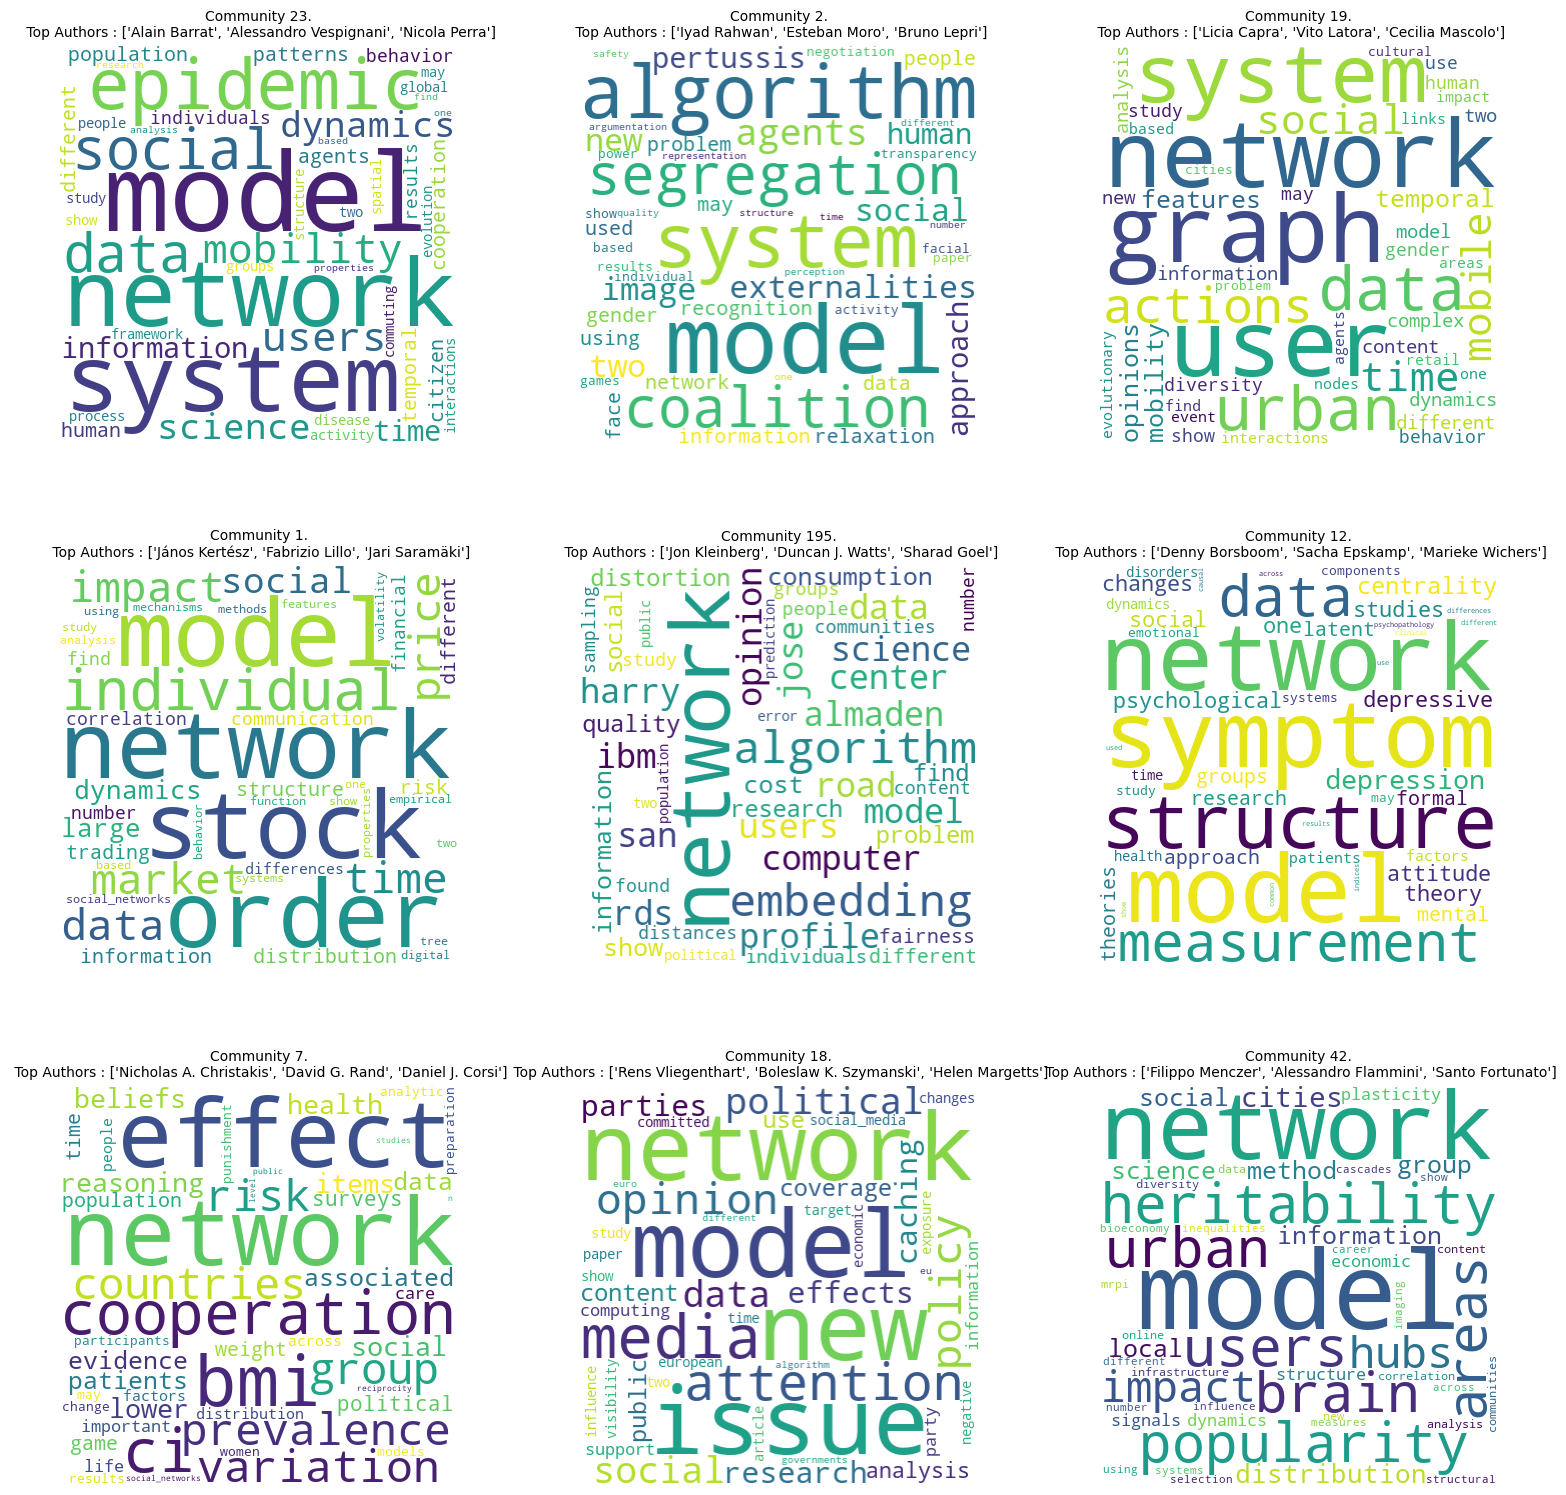

In [104]:
Author_df = pd.read_csv('data/IC2S2_all_authors.csv')

top_tfidf_words = {}
Top_com_authors = {}
for c in Top_9_communities:
    Top_com_authors[c] = [list(Author_df.loc[Author_df['id']==top_authors[c][i]].display_name)[0] for i in range(3)]
    top_tfidf_words[c] = [word[0] for word in sorted(TF_IDF[c].items(), key=lambda x: x[1], reverse=True)[:50]] 




# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 16))

# Iterate through each subplot position and word frequency data
for (i, j), c in zip(product(range(3), repeat=2), Top_9_communities):
    # Generate word cloud for the current data
    data = " ".join(top_tfidf_words[c])
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(data)
   
    # Plot the word cloud on the corresponding subplot
    axs[i, j].imshow(wordcloud, interpolation='bilinear')
    axs[i, j].set_title(f'Community {c}.\n Top Authors : {Top_com_authors[c]}',fontsize = 10)
    axs[i, j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)

plt.show()


# References

[1] http://networksciencebook.com/chapter/3

[2] Baronchelli, Andrea & Ferrer-i-Cancho, Ramon & Pastor-Satorras, Romualdo & Chater, Nick & Christiansen, Morten. (2013). Networks in Cognitive Science. Trends in cognitive sciences. 17. 10.1016/j.tics.2013.04.010.  